In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas 
import numpy as np
import xarray as xr
import xesmf 


In [2]:
ds = xr.open_dataset('/Users/isarios/Hollings_Docs/Hollings/Code/initial_data/zooplankton_data_luo.nc')
ds

<xarray.Dataset>
Dimensions:           (TIME: 12, XT_OCEAN: 360, YT_OCEAN: 200, bnds: 2)
Coordinates:
  * XT_OCEAN          (XT_OCEAN) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * YT_OCEAN          (YT_OCEAN) float64 -81.5 -80.5 -79.5 ... 87.5 88.5 89.5
  * TIME              (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    YT_OCEAN_bnds     (YT_OCEAN, bnds) float64 ...
    TIME_bnds         (TIME, bnds) object ...
    SMALLZOO_BIOMASS  (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    MEDZOO_BIOMASS    (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    LARGEZOO_BIOMASS  (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    SMALLZOO_PROD     (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    MEDZOO_PROD       (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    LARGEZOO_PROD     (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    GEOLAT_T          (YT_OCEAN, XT_OCEAN) float32 ...
    GEOLON_T          (YT_OCEAN, XT_OCEAN) float32 ...
Attributes:
    history:      FERRET V6.85 (beta) 20-Oct-14
    Conventions:  CF-1.0

In [3]:
csv_fil = '/Users/isarios/Hollings_Docs/Hollings/Hollings_2020/ReefLocations.csv'
df = pandas.read_csv(csv_fil,encoding= 'unicode_escape')

In [4]:
df

,ID,REGION,SUBREGION,COUNTRY,LOCATION,LAT,LON,REEF_SYSTEM,REEF_TYPE,REEF_NAME,WATER_DEPTH,ISLAND_NAME,PROTECTED,TOURISM,COUNTRY_CODE
0,33,NaN,NaN,NaN,NaN,0.21667,-176.48333,Baker Island,Fringing,Baker Island,NaN,NaN,1,0,NaN
1,7976,NaN,NaN,NaN,NaN,0.03333,6.66667,Spo TomT and Prfncipe,Non-reef coral community,Spo TomT and Prfncipe,NaN,NaN,0,0,NaN
2,3575,NaN,NaN,NaN,NaN,27.95000,-82.95000,Clearwater,NaN,Clearwater,NaN,NaN,0,1,NaN
3,10302,NaN,NaN,NaN,NaN,28.88333,34.73333,Gulf of Aqaba,NaN,Gulf of Aqaba,NaN,NaN,0,0,NaN
4,3948,NaN,NaN,NaN,NaN,26.88333,-82.56667,Crystal River,NaN,Crystal River,NaN,NaN,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10043,8289,Pacific,Southwest Pacific,Vanuatu,Torres Islands,-13.40000,166.60000,Loh,Fringing,Loh,NaN,NaN,0,0,VUT
10044,8290,Pacific,Southwest Pacific,Vanuatu,Torres Islands,-13.33333,166.65000,Linua,Fringing,Linua,NaN,NaN,0,0,VUT
10045,8291,Pacific,Southwest Pacific,Vanuatu,Torres Islands,-13.31667,166.56667,Tegua,Fringing,Tegua,NaN,NaN,0,0,VUT
10046,8292,Pacific,Southwest Pacific,Vanuatu,Torres Islands,-13.25000,166.63333,Metoma,Fringing,Metoma,NaN,NaN,0,0,VUT


In [5]:
rf_locs = xr.Dataset()
rf_locs['lon'] = xr.DataArray(data=df['LON'], dims=('reef_sites'))
rf_locs['lat'] = xr.DataArray(data=df['LAT'], dims=('reef_sites'))

In [6]:
rf_locs

<xarray.Dataset>
Dimensions:     (reef_sites: 10048)
Coordinates:
  * reef_sites  (reef_sites) int64 0 1 2 3 4 5 ... 10043 10044 10045 10046 10047
Data variables:
    lon         (reef_sites) float64 -176.5 6.667 -82.95 ... 166.6 166.6 166.6
    lat         (reef_sites) float64 0.2167 0.03333 27.95 ... -13.25 -13.15

In [7]:
ds.rename({'GEOLON_T': 'lon', 'GEOLAT_T': 'lat'})

<xarray.Dataset>
Dimensions:           (TIME: 12, XT_OCEAN: 360, YT_OCEAN: 200, bnds: 2)
Coordinates:
  * XT_OCEAN          (XT_OCEAN) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * YT_OCEAN          (YT_OCEAN) float64 -81.5 -80.5 -79.5 ... 87.5 88.5 89.5
  * TIME              (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    YT_OCEAN_bnds     (YT_OCEAN, bnds) float64 ...
    TIME_bnds         (TIME, bnds) object ...
    SMALLZOO_BIOMASS  (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    MEDZOO_BIOMASS    (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    LARGEZOO_BIOMASS  (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    SMALLZOO_PROD     (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    MEDZOO_PROD       (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    LARGEZOO_PROD     (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    lat               (YT_OCEAN, XT_OCEAN) float32 ...
    lon               (YT_OCEAN, XT_OCEAN) float32 ...
Attributes:
    history:      FERRET V6.85 (beta) 20-Oct-14
    Conventions:  CF-1.0

In [8]:
regridder = xesmf.Regridder(ds.rename({'GEOLON_T': 'lon','GEOLAT_T': 'lat'}), rf_locs, 'bilinear', locstream_out=True)

Overwrite existing file: bilinear_200x360_1x10048.nc 
 You can set reuse_weights=True to save computing time.


In [9]:
zpb_rf_locs = regridder((ds['SMALLZOO_BIOMASS']+ds['MEDZOO_BIOMASS']+ds['LARGEZOO_BIOMASS']))

In [11]:
nm = 6

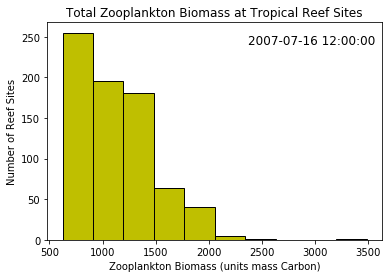

In [40]:
fid, ax =  plt.subplots() 
zpb_rf_locs.isel(TIME=nm).plot.hist(ax=ax,edgecolor='black', color='y') 
ax.set_title('Total Zooplankton Biomass at Tropical Reef Sites')
ax.set_ylabel('Number of Reef Sites')
ax.set_xlabel('Zooplankton Biomass (units mass Carbon)')
ax.text(ax.get_xlim()[1]-.4*(np.diff(ax.get_xlim())), ax.get_ylim()[1]-.1*(np.diff(ax.get_ylim())), zpb_rf_locs['TIME'].isel(TIME=nm).values, fontsize=12)

plt.show()

In [30]:
##Cut to the Caribbean
df2=df.loc[(df['LON']>=-120)&(df['LON']<=-60)&(df['LAT']>=-10)]

In [31]:
##set up new xarray with only the croppped information
rf_car_locs = xr.Dataset()
rf_car_locs['lon'] = xr.DataArray(data=df2['LON'], dims=('reef_sites'))
rf_car_locs['lat'] = xr.DataArray(data=df2['LAT'], dims=('reef_sites'))


In [32]:
regridder = xesmf.Regridder(ds.rename({'GEOLON_T': 'lon','GEOLAT_T': 'lat'}), rf_car_locs, 'bilinear', locstream_out=True)

Create weight file: bilinear_200x360_1x1084.nc


In [33]:
zpb_rf_locs = regridder((ds['SMALLZOO_BIOMASS']+ds['MEDZOO_BIOMASS']+ds['LARGEZOO_BIOMASS']))

In [34]:
nm = 6

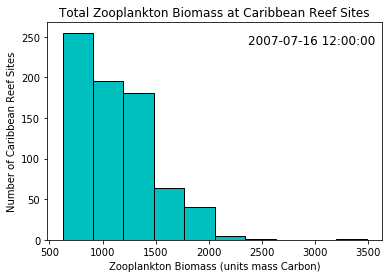

In [43]:
fid, ax =  plt.subplots()
zpb_rf_locs.isel(TIME=nm).plot.hist(ax=ax,edgecolor='black',color='c') 
ax.set_title('Total Zooplankton Biomass at Caribbean Reef Sites')
ax.set_ylabel('Number of Caribbean Reef Sites')
ax.set_xlabel('Zooplankton Biomass (units mass Carbon)')
ax.text(ax.get_xlim()[1]-.4*(np.diff(ax.get_xlim())), ax.get_ylim()[1]-.1*(np.diff(ax.get_ylim())), zpb_rf_locs['TIME'].isel(TIME=nm).values, fontsize=12)


plt.show()